In [1]:
import json

with open("time_report.json", "r") as file:
    time_report = json.load(file)

with open("iterations_report.json", "r") as file:
    iterations_report = json.load(file)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.ticker import ScalarFormatter
from matplotlib.axes import Axes

def plot_average_time_report(light_fields, target_rates):
    algorithm_colors = {
        "bisection": "darkorange",
        "hsplit": "darkblue", 
        "hslope": "darkred",
    }

    fig, ax = plt.subplots()
    ax: Axes

    # ax.set_title(f'Average time report for light fields')
    ax.set_xscale("log")
    ax.set_xlabel("Rate (Bpp)")
    ax.set_ylabel("Execution Time (Seconds)")
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.get_xaxis().set_tick_params(which='minor', size=0)
    ax.get_xaxis().set_tick_params(which='minor', width=0) 

    for rate in target_rates:
        ax.axvline(rate, linestyle=":", color="0.8", zorder=0)

    for algo, color in algorithm_colors.items():
        computed_rates = []
        averages = []
        minimum = []
        maximum = []

        for rate in target_rates:
            all_times = []

            for lf in light_fields:
                lf_data: dict = time_report.get(lf)
                if lf_data is None:
                    print(f'"{lf}" not found in the time report file.')
                    continue

                rate_data: dict = lf_data.get(str(rate))
                if rate_data is None:
                    print(f'Rate "{rate}" not found in "{lf}" using the algorithm "{algo}".')
                    continue

                times = rate_data.get(algo)
                if times is None:
                    print(f'No time data found in "{lf}" for rate {rate} using the algorithm "{algo}".')
                    continue
                all_times.extend(times)

            computed_rates.append(rate)
            averages.append(np.average(all_times))
            minimum.append(np.min(all_times))
            maximum.append(np.max(all_times))
        
        ax.fill_between(computed_rates, minimum, maximum, color=to_rgba(color, 0.1))
        ax.plot(computed_rates, averages, color=color)
        ax.scatter(computed_rates, averages, color=color, s=20, label=algo)
        ax.set_xticks(target_rates)
        ax.tick_params(axis='x', labelrotation=30)

    ax.legend()
    plt.show()

# # Lenslet, Tarot
# plot_average_time_report(
#     light_fields = [
#         # Lenslet
#         "Bikes",
#         "Danger_de_Mort",
#         "Fountain_Vincent2",
#         "Stone_Pillars_Outside",

#         # Tarot
#         "tarot",
#     ],
    
#     target_rates = [
#         0.001,
#         0.005,
#         0.02,
#         0.1,
#         0.75
#     ]
# )

# # Synthetic
# plot_average_time_report(
# light_fields = [
#     # Synthetic
#     "greek",
#     "sideboard",
# ],

# target_rates = [
#     0.005,
#     0.02,
#     0.1,
#     0.75
# ]
# )

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.ticker import ScalarFormatter
from matplotlib.axes import Axes

def plot_time_report(light_fields, target_rates):
    algorithm_style = {
        "bisection": ("limegreen", "o"),
        "hsplit":    ("dodgerblue",   "v"), 
        "hslope":    ("crimson",    "s"),
    }

    for lf_name in light_fields:
        lf_data: dict = time_report.get(lf_name)
        if lf_data is None:
            print(f'"{lf_name}" not found in the time report file.')
            continue

        fig, ax = plt.subplots(figsize=[5,3])
        ax: Axes

        ax.set_title(f'Tempo de Execução: "{lf_name}"')
        ax.set_xscale("log")
        ax.set_xlabel("Taxa (bpp)")
        ax.set_ylabel("Tempo de Execução (Segundos)")
        ax.get_xaxis().set_major_formatter(ScalarFormatter())
        ax.get_xaxis().set_tick_params(which='minor', size=0)
        ax.get_xaxis().set_tick_params(which='minor', width=0) 

        for rate in target_rates:
            ax.axvline(rate, linestyle=":", color="0.8", zorder=0)

        for algo, (color, marker) in algorithm_style.items():
            computed_rate = []
            averages = []
            minimum = []
            maximum = []

            for rate in target_rates:
                rate_data: dict = lf_data.get(str(rate))
                if rate_data is None:
                    print(f'Rate "{rate}" not found in "{lf_name}" using the algorithm "{algo}".')
                    continue

                times = rate_data.get(algo)
                if times is None:
                    print(f'No time data found in "{lf_name}" for rate {rate} using the algorithm "{algo}".')
                    continue

                try:
                    data = iterations_report[lf_name][str(rate)][algo]
                    found_rate = data[-1]["bpp"]
                except KeyError:
                    print(f'No iteration data found for "{lf_name}" for rate {rate} using the algorithm "{algo}".')
                    continue

                computed_rate.append(found_rate)
                averages.append(np.average(times))
                minimum.append(np.min(times))
                maximum.append(np.max(times))

            ax.fill_between(computed_rate, minimum, maximum, color=to_rgba(color, 0.3))
            ax.plot(computed_rate, averages, color=color)
            ax.scatter(computed_rate, averages, color=color, marker=marker, s=20, label=algo)
            ax.set_xticks(target_rates)
            ax.tick_params(axis='x', labelrotation=30)

        ax.legend()
        plt.tight_layout()
        plt.savefig(f"time_report/{lf_name.lower()}.png", dpi=300)
        plt.savefig(f"time_report/{lf_name.lower()}.pdf")
        plt.show()

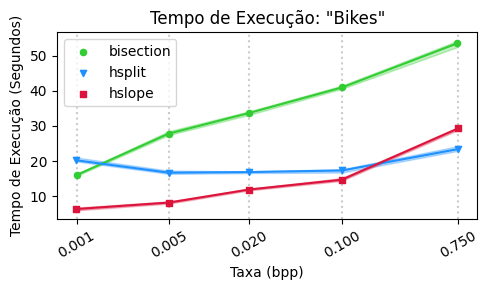

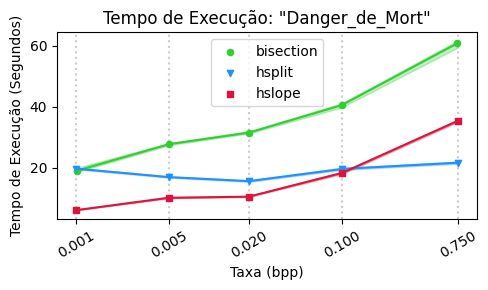

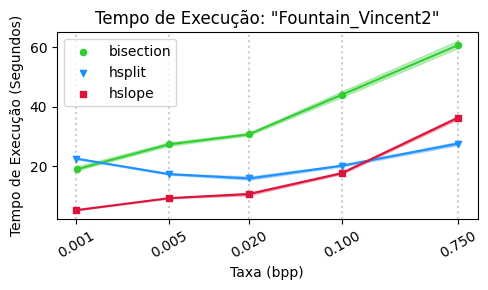

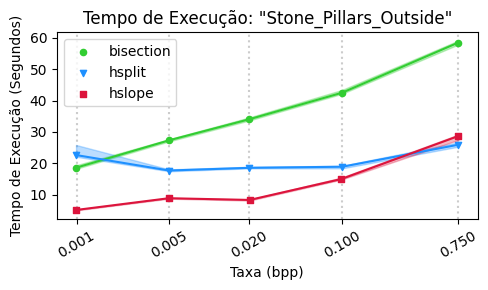

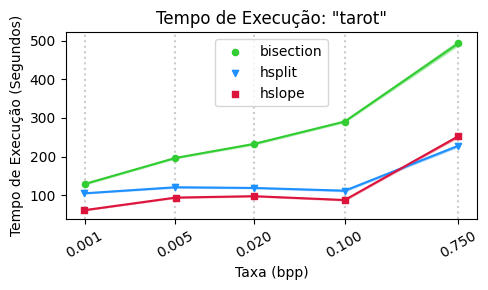

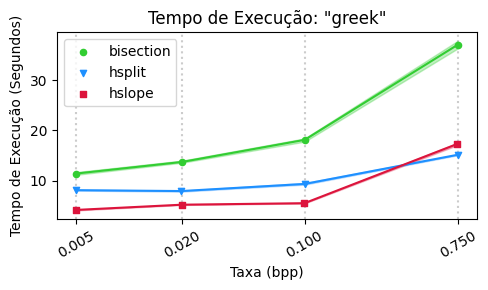

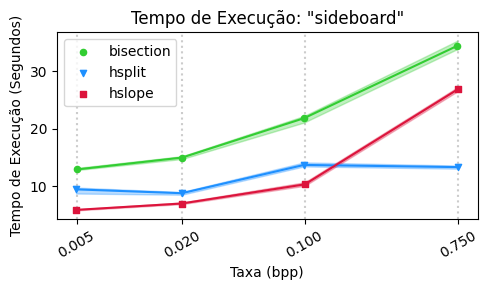

In [60]:
# Plot time reports

# Lenslet, Synthetic, Tarot
plot_time_report(
    light_fields = [
        # lenslet
        "Bikes",
        "Danger_de_Mort",
        "Fountain_Vincent2",
        "Stone_Pillars_Outside",

        # Tarot
        "tarot",
    ],
    
    target_rates = [
        0.001,
        0.005,
        0.02,
        0.1,
        0.75
    ]
)

plot_time_report(
    light_fields = [
        # Synthetic
        "greek",
        "sideboard",
    ],
    
    target_rates = [
        0.005,
        0.02,
        0.1,
        0.75
    ]
)


# Set2 and Poznan
# plot_time_report(
#     light_fields = [
#         "set2",
#         "poznanlab1",
#     ],

#     target_rates = [
#         0.0005,
#         0.001,
#         0.005,
#         0.01,
#         0.05,
#         0.1
#     ]
# )

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.ticker import ScalarFormatter
from matplotlib.axes import Axes


def plot_speedup_report(light_fields, target_rates):
    algorithm_style = {
        "bisection": ("limegreen", "o"),
        "hsplit":    ("dodgerblue",   "v"), 
        "hslope":    ("crimson",    "s"),
    }

    for lf_name in light_fields:
        lf_data: dict = time_report.get(lf_name)
        if lf_data is None:
            print(f'"{lf_name}" not found in the time report file.')
            continue

        fig, ax = plt.subplots(figsize=[5,3])
        ax: Axes

        ax.set_title(f'Speedup sobre a bisseção: {lf_name}')
        ax.set_xscale("log")
        ax.set_xlabel("Taxa (bpp)")
        ax.set_ylabel("Speedup")
        ax.get_xaxis().set_major_formatter(ScalarFormatter())
        ax.get_xaxis().set_tick_params(which='minor', size=0)
        ax.get_xaxis().set_tick_params(which='minor', width=0) 

        for rate in target_rates:
            ax.axvline(rate, linestyle=":", color="0.8", zorder=0)

        for algo, (color, marker) in algorithm_style.items():
            computed_rate = []
            speedups = []

            for rate in target_rates:
                rate_data: dict = lf_data.get(str(rate))
                if rate_data is None:
                    print(f'Rate "{rate}" not found in "{lf_name}" using the algorithm "{algo}".')
                    continue

                times = rate_data.get(algo)
                if times is None:
                    print(f'No time data found in "{lf_name}" for rate {rate} using the algorithm "{algo}".')
                    continue

                bissection_data = rate_data.get("bisection")
                if times is None:
                    print(f'No time data found in "{lf_name}" for rate {rate} using the algorithm bisection.')
                    continue

                try:
                    data = iterations_report[lf_name][str(rate)][algo]
                    found_rate = data[-1]["bpp"]
                except KeyError:
                    print(f'No iteration data found for "{lf_name}" for rate {rate} using the algorithm "{algo}".')
                    continue

                computed_rate.append(found_rate)
                speedups.append(np.median(bissection_data) / np.median(times))

            print(max(speedups))
            ax.plot(computed_rate, speedups, color=color)
            ax.scatter(computed_rate, speedups, color=color, marker=marker, s=20, label=algo)
            ax.set_xticks(target_rates)
            ax.tick_params(axis='x', labelrotation=30)

        ax.legend()
        plt.tight_layout()
        plt.savefig(f"speedup/{lf_name.lower()}.png", dpi=300)
        plt.savefig(f"speedup/{lf_name.lower()}.pdf")
        plt.show()

1.0
2.3661047157023543
3.379037444730542


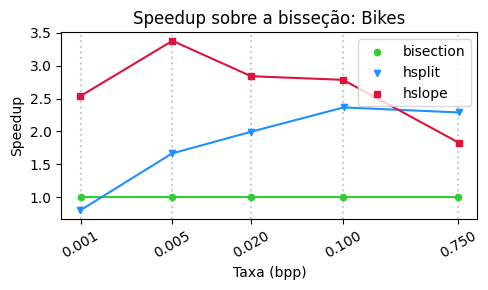

1.0
2.8001589681256385
3.0636570597589285


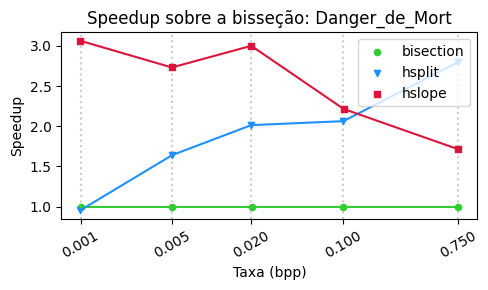

1.0
2.202993251867771
3.565900898648875


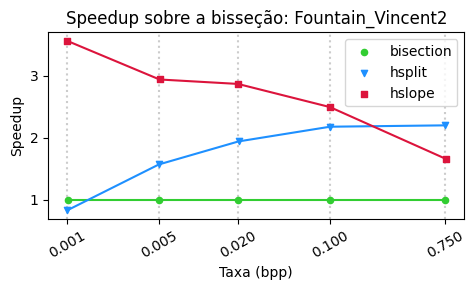

1.0
2.255067001668673
4.028193514142696


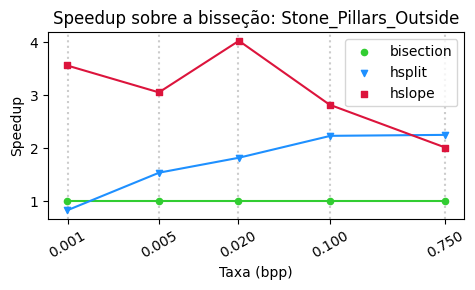

1.0
2.6136162735945345
3.336951374882554


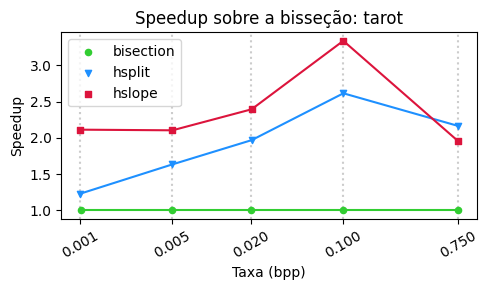

1.0
2.4473139637082393
3.2942232480535925


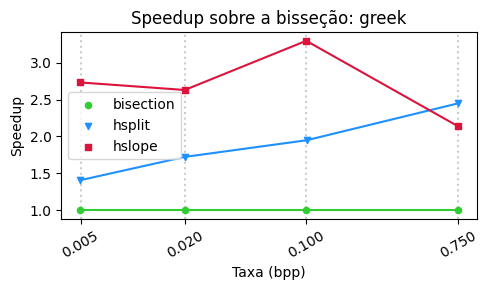

1.0
2.569130183428754
2.173311368529904


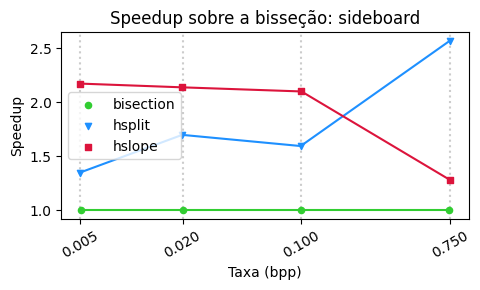

In [73]:
# Plot speedup
plot_speedup_report(
    light_fields = [
        # Lenslet
        "Bikes",
        "Danger_de_Mort",
        "Fountain_Vincent2",
        "Stone_Pillars_Outside",

        # Tarot
        "tarot",
    ],
    
    target_rates = [
        0.001,
        0.005,
        0.02,
        0.1,
        0.75
    ]
)

plot_speedup_report(
    light_fields = [
        # Synthetic
        "greek",
        "sideboard",
    ],
    
    target_rates = [
        0.005,
        0.02,
        0.1,
        0.75
    ]
)



In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.ticker import ScalarFormatter
from matplotlib.axes import Axes


def plot_average_speedup_report(light_fields, target_rates):
    algorithm_style = {
        "bisection": ("limegreen", "o"),
        "hsplit":    ("dodgerblue",   "v"), 
        "hslope":    ("crimson",    "s"),
    }

    fig, ax = plt.subplots(figsize=[5,3])
    ax: Axes

    ax.set_title('Speedup médio sobre a bisseção')
    ax.set_xscale("log")
    ax.set_xlabel("Taxa (bpp)")
    ax.set_ylabel("Speedup")
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.get_xaxis().set_tick_params(which='minor', size=0)
    ax.get_xaxis().set_tick_params(which='minor', width=0) 

    for rate in target_rates:
        ax.axvline(rate, linestyle=":", color="0.8", zorder=0)

    for algo, (color, marker) in algorithm_style.items():
        computed_rates = []
        speedups = []
        min_speedups = []
        max_speedups = []

        for rate in target_rates:
            current_speedups = []

            for lf_name in light_fields:
                lf_data: dict = time_report.get(lf_name)
                if lf_data is None:
                    print(f'"{lf_name}" not found in the time report file.')
                    continue

                rate_data: dict = lf_data.get(str(rate))
                if rate_data is None:
                    print(f'Rate "{rate}" not found in "{lf_name}".')
                    continue

                times = rate_data.get(algo)
                if times is None:
                    print(f'No time data found in "{lf_name}" for rate {rate} using the algorithm "{algo}".')
                    continue

                bissection_data = rate_data.get("bisection")
                if times is None:
                    print(f'No time data found in "{lf_name}" for rate {rate} using the algorithm bisection.')
                    continue
                
                speedup = np.median(bissection_data) / np.median(times)
                current_speedups.append(speedup)

            computed_rates.append(rate)
            speedups.append(np.average(current_speedups))
            min_speedups.append(np.min(current_speedups))
            max_speedups.append(np.max(current_speedups))

        ax.plot(computed_rates, speedups, color=color)
        ax.fill_between(computed_rates, min_speedups, max_speedups, color=to_rgba(color, 0.3))
        ax.scatter(computed_rates, speedups, color=color, marker=marker, s=20, label=algo)
        ax.set_xticks(target_rates)
        ax.tick_params(axis='x', labelrotation=30)

    ax.legend()
    plt.tight_layout()
    plt.savefig(f"speedup/averages.png", dpi=300)
    plt.savefig(f"speedup/averages.pdf")
    plt.show()

Rate "0.001" not found in "greek".
Rate "0.001" not found in "sideboard".
Rate "0.001" not found in "greek".
Rate "0.001" not found in "sideboard".
Rate "0.001" not found in "greek".
Rate "0.001" not found in "sideboard".


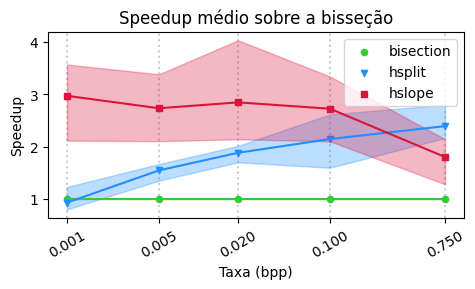

In [75]:
# Plot speedup
plot_average_speedup_report(
    light_fields = [
        # Lenslet
        "Bikes",
        "Danger_de_Mort",
        "Fountain_Vincent2",
        "Stone_Pillars_Outside",

        # Tarot
        "tarot",

        # Synthetic
        "greek",
        "sideboard",
    ],
    
    target_rates = [
        0.001,
        0.005,
        0.02,
        0.1,
        0.75
    ]
)

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.ticker import ScalarFormatter
from matplotlib.axes import Axes


def plot_overhead_report(light_fields, target_rates):
    algorithm_style = {
        "bisection": ("limegreen",  "o"),
        "hsplit":    ("dodgerblue", "v"), 
        "hslope":    ("crimson",    "s"),
    }

    for lf_name in light_fields:
        lf_data: dict = time_report.get(lf_name)
        if lf_data is None:
            print(f'"{lf_name}" not found in the time report file.')
            continue

        fig, ax = plt.subplots(figsize=[5,3])
        ax: Axes

        ax.set_title(f'Overhead sobre um oráculo: {lf_name}')
        ax.set_xscale("log")
        ax.set_xlabel("Taxa (bpp)")
        ax.set_ylabel("Overhead")
        ax.get_xaxis().set_major_formatter(ScalarFormatter())
        ax.get_xaxis().set_tick_params(which='minor', size=0)
        ax.get_xaxis().set_tick_params(which='minor', width=0) 

        for rate in target_rates:
            ax.axvline(rate, linestyle=":", color="0.8", zorder=0)

        for algo, (color, marker) in algorithm_style.items():
            computed_rate = []
            overheads = []

            for rate in target_rates:
                rate_data: dict = lf_data.get(str(rate))
                if rate_data is None:
                    print(f'Rate "{rate}" not found in "{lf_name}" using the algorithm "{algo}".')
                    continue

                times = rate_data.get(algo)
                if times is None:
                    print(f'No time data found in "{lf_name}" for rate {rate} using the algorithm "{algo}".')
                    continue

                oracle_data = rate_data.get("oracle")
                if times is None:
                    print(f'No time data found in "{lf_name}" for rate {rate} for oracle.')
                    continue

                try:
                    data = iterations_report[lf_name][str(rate)][algo]
                    found_rate = data[-1]["bpp"]
                except KeyError:
                    print(f'No iteration data found for "{lf_name}" for rate {rate} using the algorithm "{algo}".')
                    continue

                computed_rate.append(found_rate)
                overheads.append(np.median(times) / np.median(oracle_data))

            print(max(overheads))
            ax.plot(computed_rate, overheads, color=color)
            ax.scatter(computed_rate, overheads, color=color, marker=marker, s=20, label=algo)
            ax.set_xticks(target_rates)
            ax.tick_params(axis='x', labelrotation=30)

        # Oracle for reference
        ax.plot(target_rates, [1] * len(target_rates), color="black")
        ax.scatter(target_rates, [1] * len(target_rates), color="black", marker="*", s=20, label="oracle")

        ax.legend()
        plt.tight_layout()
        plt.savefig(f"overhead/{lf_name.lower()}.png", dpi=300)
        plt.savefig(f"overhead/{lf_name.lower()}.pdf")
        plt.show()

13.123365749709073
8.584261623504487
6.393181251565341


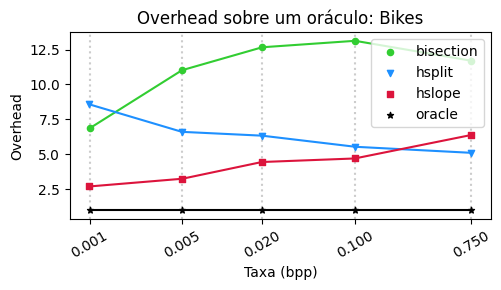

12.382232433705578
8.43009518572686
6.983210270978922


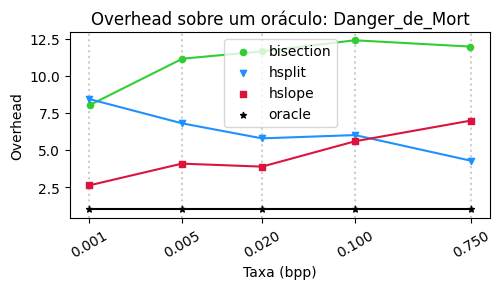

12.989569756178069
9.696318444662172
6.5051783080305485


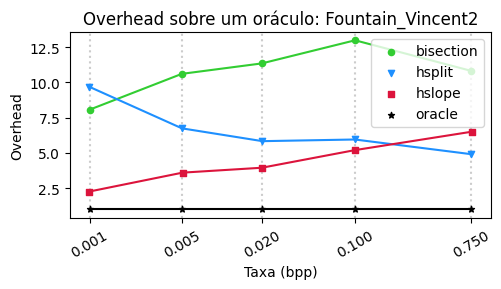

13.7176964402896
9.521673756271364
6.428128506846551


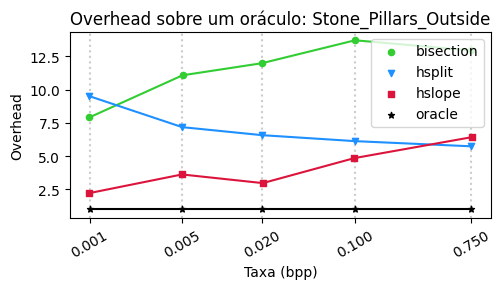

15.472146768725793
8.735829078727074
6.782871704735607


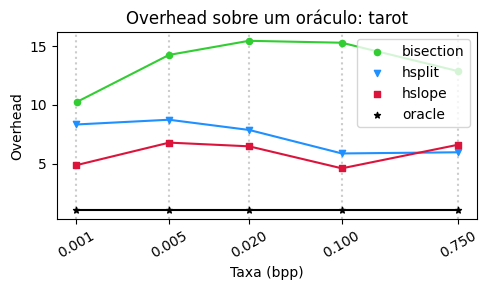

12.68638456235255
5.818039123998844
5.9260016268294535


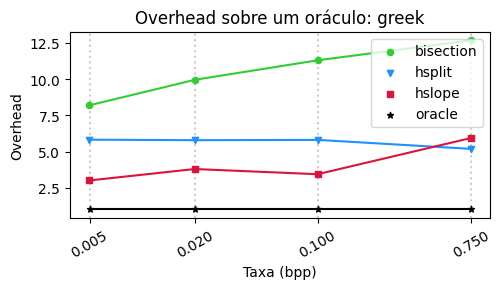

11.290264399149809
4.41619047615384
8.820388470049819


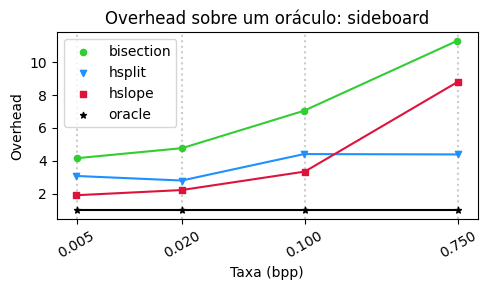

In [77]:
# Plot speedup
plot_overhead_report(
    light_fields = [
        # Lenslet
        "Bikes",
        "Danger_de_Mort",
        "Fountain_Vincent2",
        "Stone_Pillars_Outside",

        # Tarot
        "tarot",
    ],
    
    target_rates = [
        0.001,
        0.005,
        0.02,
        0.1,
        0.75
    ]
)

plot_overhead_report(
    light_fields = [
        # Synthetic
        "greek",
        "sideboard",
    ],
    
    target_rates = [
        0.005,
        0.02,
        0.1,
        0.75
    ]
)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.ticker import ScalarFormatter
from matplotlib.axes import Axes


def plot_average_overhead_report(light_fields, target_rates):
    algorithm_style = {
        "bisection": ("limegreen", "o"),
        "hsplit":    ("dodgerblue",   "v"), 
        "hslope":    ("crimson",    "s"),
    }

    fig, ax = plt.subplots(figsize=[5,3])
    ax: Axes

    ax.set_title('Overhead médio sobre um oráculo')
    ax.set_xscale("log")
    ax.set_xlabel("Taxa (bpp)")
    ax.set_ylabel("Overhead")
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.get_xaxis().set_tick_params(which='minor', size=0)
    ax.get_xaxis().set_tick_params(which='minor', width=0) 

    for rate in target_rates:
        ax.axvline(rate, linestyle=":", color="0.8", zorder=0)

    for algo, (color, marker) in algorithm_style.items():
        computed_rates = []
        overheads = []
        min_overheads = []
        max_overheads = []

        for rate in target_rates:
            current_overheads = []

            for lf_name in light_fields:
                lf_data: dict = time_report.get(lf_name)
                if lf_data is None:
                    print(f'"{lf_name}" not found in the time report file.')
                    continue

                rate_data: dict = lf_data.get(str(rate))
                if rate_data is None:
                    print(f'Rate "{rate}" not found in "{lf_name}".')
                    continue

                times = rate_data.get(algo)
                if times is None:
                    print(f'No time data found in "{lf_name}" for rate {rate} using the algorithm "{algo}".')
                    continue

                oracle_data = rate_data.get("oracle")
                if times is None:
                    print(f'No time data found in "{lf_name}" for rate {rate} using the algorithm bisection.')
                    continue
                
                overhead = np.median(times) / np.median(oracle_data)
                current_overheads.append(overhead)

            computed_rates.append(rate)
            overheads.append(np.average(current_overheads))
            min_overheads.append(np.min(current_overheads))
            max_overheads.append(np.max(current_overheads))

        ax.plot(computed_rates, overheads, color=color)
        ax.fill_between(computed_rates, min_overheads, max_overheads, color=to_rgba(color, 0.3))
        ax.scatter(computed_rates, overheads, color=color, marker=marker, s=20, label=algo)
        ax.set_xticks(target_rates)
        ax.tick_params(axis='x', labelrotation=30)

    # Oracle for reference
    ax.plot(target_rates, [1] * len(target_rates), color="black")
    ax.scatter(target_rates, [1] * len(target_rates), color="black", marker="*", s=20, label="oracle")

    ax.legend()
    plt.tight_layout()
    plt.savefig(f"overhead/averages.png", dpi=300)
    plt.savefig(f"overhead/averages.pdf")
    plt.show()

Rate "0.001" not found in "greek".
Rate "0.001" not found in "sideboard".
Rate "0.001" not found in "greek".
Rate "0.001" not found in "sideboard".
Rate "0.001" not found in "greek".
Rate "0.001" not found in "sideboard".


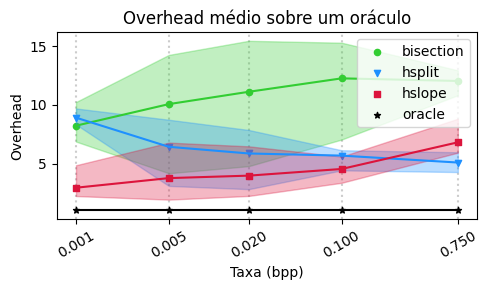

In [3]:
# Plot speedup
plot_average_overhead_report(
    light_fields = [
        # Lenslet
        "Bikes",
        "Danger_de_Mort",
        "Fountain_Vincent2",
        "Stone_Pillars_Outside",

        # Tarot
        "tarot",

        # Synthetic
        "greek",
        "sideboard",
    ],
    
    target_rates = [
        0.001,
        0.005,
        0.02,
        0.1,
        0.75
    ]
)